In [264]:
import warnings
# Suppress pgmpy internal deprecated use of third party libraries.
warnings.simplefilter(action='ignore', category=FutureWarning)
# Suppress UserWarning related to machine precision calculations of percentage.
warnings.simplefilter(action='ignore', category=UserWarning)

from extended_classes import *
from pgmpy.factors.discrete.CPD import TabularCPD
from pgmpy.inference import VariableElimination, ApproxInference

import numpy as np

from utils import *
from variables import *

from IPython.display import display

import matplotlib.pyplot as plt

In [265]:
RANDOM_STATE = 50

In [266]:
%matplotlib inline

In [267]:
"""PER_UNIT_GDP = 'Per unit GDP'
POPULATION_DENSITY = 'Population density'
ROAD_DENSITY = 'Road density'
ELEVATION = 'Elevation'
SLOPE = 'Slope'
RAINFALL_FREQUENCY = 'Rainfall frequency'
RIVER_DENSITY = 'River density'
RAINFALL_AMOUNT = 'Rainfall amount'
FLOOD = 'Flood'"""

"PER_UNIT_GDP = 'Per unit GDP'\nPOPULATION_DENSITY = 'Population density'\nROAD_DENSITY = 'Road density'\nELEVATION = 'Elevation'\nSLOPE = 'Slope'\nRAINFALL_FREQUENCY = 'Rainfall frequency'\nRIVER_DENSITY = 'River density'\nRAINFALL_AMOUNT = 'Rainfall amount'\nFLOOD = 'Flood'"

In [268]:
variables = [
    PER_UNIT_GDP,
    POPULATION_DENSITY,
    ROAD_DENSITY,
    ELEVATION,
    SLOPE,
    RAINFALL_FREQUENCY,
    RIVER_DENSITY,
    RAINFALL_AMOUNT,
    FLOOD
]
print(variables)

['Per unit GDP', 'Population density', 'Road density', 'Elevation', 'Slope', 'Rainfall frequency', 'River density', 'Rainfall amount', 'Flood']


In [269]:
values_dictionary = {
    PER_UNIT_GDP: [
        [0.3], 
        [0.63], 
        [0.07]
    ],
    POPULATION_DENSITY: [
        [0.7, 0.3, 0.05],
        [0.2, 0.55, 0.25],
        [0.1, 0.15, 0.7],
    ],
    ROAD_DENSITY: [
        [0.8, 0.7, 0.1, 0.6, 0.4, 0.1, 0.1, 0.05, 0.01],
        [0.19, 0.25, 0.35, 0.3, 0.5, 0.25, 0.25, 0.2, 0.15],
        [0.01, 0.05, 0.55, 0.1, 0.1, 0.65, 0.65, 0.75, 0.84]
    ],
    ELEVATION: [
        [0.15],
        [0.1], 
        [0.75]
    ],
    SLOPE: [
        [0.75, 0.6, 0.05], 
        [0.25, 0.4, 0.95]
    ],
    RAINFALL_FREQUENCY: [
        [0.3], 
        [0.6], 
        [0.1]
    ],
    RIVER_DENSITY: [
        [0.4], 
        [0.6]
    ],
    RAINFALL_AMOUNT: [
        [0.7, 0.5, 0.55, 0.3, 0.1, 0.01],
        [0.2, 0.25, 0.3, 0.4, 0.3, 0.04],
        [0.1, 0.25, 0.15, 0.3, 0.6, 0.95]
    ],
    FLOOD: [
        [0.07, 0.03, 0.005, 0.2, 0.1, 0.008, 0.05, 0.009, 0.0005, 0.13, 0.08, 0.006, 0.008, 0.002, 0.0001, 0.1, 0.04, 0.0002],
        [0.93, 0.97, 0.995, 0.8, 0.9, 0.992, 0.95, 0.991, 0.9995, 0.87, 0.92, 0.994, 0.992, 0.998, 0.9999, 0.9, 0.96, 0.9998]
    ],
}

# FLOOD, ROAD_DENSITY, SLOPE, RAINFALL_AMOUNT

In [270]:
state_names_dictionary = {
    PER_UNIT_GDP: ['High', 'Medium', 'Low'],
    POPULATION_DENSITY: ['Dense', 'Medium', 'Sparse'],
    ROAD_DENSITY: ['Dense', 'Medium', 'Sparse'],
    ELEVATION: ['High', 'Medium', 'Low'],
    SLOPE: ['Steep', 'Flat'],
    RAINFALL_FREQUENCY: ['Frequent', 'Medium', 'Rare'],
    RIVER_DENSITY: ['Dense', 'Sparse'],
    RAINFALL_AMOUNT: ['Huge', 'Medium', 'Little'],
    FLOOD: ['Yes', 'No']
}

In [271]:
edges = [
    (PER_UNIT_GDP, POPULATION_DENSITY),
    (PER_UNIT_GDP, ROAD_DENSITY), 
    (POPULATION_DENSITY, ROAD_DENSITY),
    (ROAD_DENSITY, FLOOD),
    (ELEVATION, SLOPE),
    (SLOPE, FLOOD),
    (RAINFALL_FREQUENCY, RAINFALL_AMOUNT),
    (RIVER_DENSITY, RAINFALL_AMOUNT),
    (RAINFALL_AMOUNT, FLOOD)
]

In [272]:
evidence_dictionary = {
    PER_UNIT_GDP: None,
    POPULATION_DENSITY: [PER_UNIT_GDP],
    ROAD_DENSITY: [PER_UNIT_GDP, POPULATION_DENSITY],
    ELEVATION: None,
    SLOPE: [ELEVATION],
    RAINFALL_FREQUENCY: None,
    RIVER_DENSITY: None,
    RAINFALL_AMOUNT: [RAINFALL_FREQUENCY, RIVER_DENSITY],
    FLOOD: [ROAD_DENSITY, SLOPE, RAINFALL_AMOUNT]
}

In [273]:
cpds = {v: get_tabular_cpd(v, state_names_dictionary, values_dictionary, evidence_dictionary) for v in variables}

In [274]:
#print(cpds[FLOOD])

In [275]:
for k, v in cpds.items():
    print('CPD Table for variable: {}'.format(k))
    display(cpd_to_pandas(v))
    print()

CPD Table for variable: Per unit GDP


,
Per unit GDP(High),0.30
Per unit GDP(Medium),0.63
Per unit GDP(Low),0.07



CPD Table for variable: Population density


,...,Per unit GDP(Low)
Population density(Dense),...,0.05
Population density(Medium),...,0.25
Population density(Sparse),...,0.70



CPD Table for variable: Road density


,...,Per unit GDP(Low)
,...,Population density(Sparse)
Road density(Dense),...,0.01
Road density(Medium),...,0.15
Road density(Sparse),...,0.84



CPD Table for variable: Elevation


,
Elevation(High),0.15
Elevation(Medium),0.10
Elevation(Low),0.75



CPD Table for variable: Slope


,Elevation(High),Elevation(Medium),Elevation(Low)
Slope(Steep),0.75,0.6,0.05
Slope(Flat),0.25,0.4,0.95



CPD Table for variable: Rainfall frequency


,
Rainfall frequency(Frequent),0.3
Rainfall frequency(Medium),0.6
Rainfall frequency(Rare),0.1



CPD Table for variable: River density


,
River density(Dense),0.4
River density(Sparse),0.6



CPD Table for variable: Rainfall amount


,...,Rainfall frequency(Rare)
,...,River density(Sparse)
Rainfall amount(Huge),...,0.01
Rainfall amount(Medium),...,0.04
Rainfall amount(Little),...,0.95



CPD Table for variable: Flood


,...,Road density(Sparse)
,...,Slope(Flat)
,...,Rainfall amount(Little)
Flood(Yes),...,0.0002
Flood(No),...,0.9998


In [276]:
# isinstance(cpds[FLOOD], TabularCPD)

In [277]:
# Defining the model structure. We can define the network by just passing a list of edges.
model = ExtendedBayesianNetwork(edges)
model.add_cpds(*[cpds[k] for k in cpds])

In [278]:
print('The model has been correctly developed: {}.'.format(model.check_model()))

The model has been correctly developed: True.


In [279]:
# model

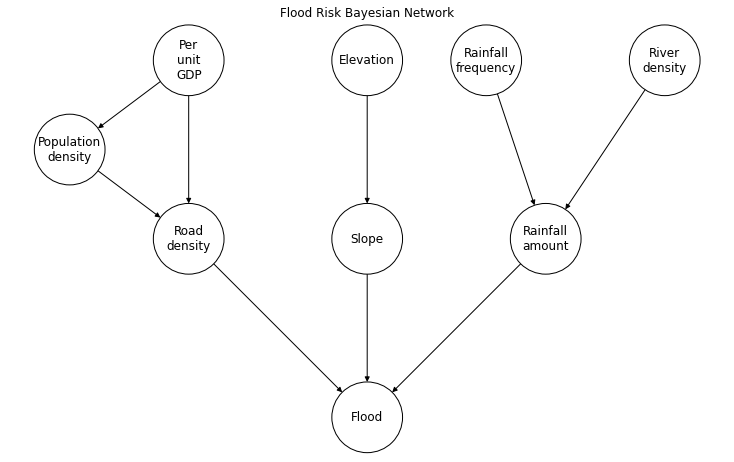

In [280]:
from graphics import *
display_bayesian_network(model)

In [281]:
"""pos={
    PER_UNIT_GDP: (10, 4), ELEVATION: (18, 4), RAINFALL_FREQUENCY: (30, 4), RIVER_DENSITY: (42, 4),
    POPULATION_DENSITY: (2,3),
    ROAD_DENSITY: (10, 2), SLOPE: (18, 2), RAINFALL_AMOUNT: (34, 2),
    FLOOD: (18,0)
}
nodenames = {n: '\n'.join(n.split(' ')) for n in model.nodes()}
nx.draw(model, pos=pos, node_size=2500, with_labels=True, labels=nodenames)
plt.show()""";

In [282]:
# ToDo: an idea can be to set the evidence, its cardinality and the state_names programmatically, 
# or even define these tables in a for loop

"""cpd_per_unit_gdp = TabularCPD(
    variable = PER_UNIT_GDP, 
    variable_card = len(state_names_dictionary[PER_UNIT_GDP]), 
    values = values_dictionary[PER_UNIT_GDP],
    state_names = get_state_names(PER_UNIT_GDP, state_names_dictionary, evidence_dictionary)
)

cpd_population_density = TabularCPD(
    variable = POPULATION_DENSITY, 
    variable_card = len(state_names_dictionary[POPULATION_DENSITY]), 
    values = values_dictionary[POPULATION_DENSITY],
    evidence = evidence_dictionary[POPULATION_DENSITY],
    evidence_card = get_evidence_card(POPULATION_DENSITY, state_names_dictionary, evidence_dictionary),
    state_names = get_state_names(POPULATION_DENSITY, state_names_dictionary, evidence_dictionary)
)

cpd_road_density = TabularCPD(
    variable = ROAD_DENSITY, 
    variable_card = len(state_names_dictionary[ROAD_DENSITY]), 
    values = values_dictionary[ROAD_DENSITY],
    evidence = evidence_dictionary[ROAD_DENSITY],
    evidence_card = get_evidence_card(ROAD_DENSITY, state_names_dictionary, evidence_dictionary),
    state_names = get_state_names(ROAD_DENSITY, state_names_dictionary, evidence_dictionary)
)

cpd_elevation = TabularCPD(
    variable = ELEVATION, 
    variable_card = len(state_names_dictionary[ELEVATION]), 
    values = values_dictionary[ELEVATION],
    state_names = get_state_names(ELEVATION, state_names_dictionary, evidence_dictionary)
)

cpd_slope = TabularCPD(
    variable = SLOPE, 
    variable_card = len(state_names_dictionary[SLOPE]), 
    values = values_dictionary[SLOPE],
    evidence = evidence_dictionary[SLOPE],
    evidence_card = get_evidence_card(SLOPE, state_names_dictionary, evidence_dictionary),
    state_names = get_state_names(SLOPE, state_names_dictionary, evidence_dictionary)
)

cpd_rainfall_frequency = TabularCPD(
    variable = RAINFALL_FREQUENCY, 
    variable_card = len(state_names_dictionary[RAINFALL_FREQUENCY]), 
    values = values_dictionary[RAINFALL_FREQUENCY],
    state_names = get_state_names(RAINFALL_FREQUENCY, state_names_dictionary, evidence_dictionary)
)

cpd_river_density = TabularCPD(
    variable = RIVER_DENSITY, 
    variable_card = len(state_names_dictionary[RIVER_DENSITY]), 
    values = values_dictionary[RIVER_DENSITY],
    state_names = get_state_names(RIVER_DENSITY, state_names_dictionary, evidence_dictionary)
)

cpd_rainfall_amount = TabularCPD(
    variable = RAINFALL_AMOUNT, 
    variable_card = len(state_names_dictionary[RAINFALL_AMOUNT]), 
    values = values_dictionary[RAINFALL_AMOUNT],
    evidence = evidence_dictionary[RAINFALL_AMOUNT],
    evidence_card = get_evidence_card(RAINFALL_AMOUNT, state_names_dictionary, evidence_dictionary),
    state_names = get_state_names(RAINFALL_AMOUNT, state_names_dictionary, evidence_dictionary)
)

cpd_flood = TabularCPD(
    variable = FLOOD, 
    variable_card = len(state_names_dictionary[FLOOD]), 
    values = values_dictionary[FLOOD],
    evidence = evidence_dictionary[FLOOD],
    evidence_card = get_evidence_card(FLOOD, state_names_dictionary, evidence_dictionary),
    state_names = get_state_names(FLOOD, state_names_dictionary, evidence_dictionary)
)""";

In [283]:
# model.add_cpds(cpd_per_unit_gdp, cpd_population_density, cpd_road_density, cpd_elevation, cpd_slope, cpd_rainfall_frequency, cpd_river_density, cpd_rainfall_amount, cpd_flood)
# model.check_model()

In [284]:
#cpd_to_pandas(cpd_per_unit_gdp)

In [285]:
#cpd_to_pandas(cpd_population_density)

In [286]:
#cpd_to_pandas(cpd_road_density)

In [287]:
#cpd_to_pandas(cpd_elevation)

In [288]:
#cpd_to_pandas(cpd_slope)

In [289]:
#cpd_to_pandas(cpd_rainfall_frequency)

In [290]:
#cpd_to_pandas(cpd_river_density)

In [291]:
#cpd_to_pandas(cpd_rainfall_amount)

In [292]:
#cpd_to_pandas(cpd_flood)

In [293]:
# Getting all the independencies given the parent nodes in the network.
print('Independecies given the parent nodes shown using the function local_independencies():')
model.local_independencies(variables)

Independecies given the parent nodes shown using the function local_independencies():


(Per unit GDP ⟂ Elevation, Slope, Rainfall frequency, Rainfall amount, River density)
(Population density ⟂ Elevation, Slope, Rainfall frequency, Rainfall amount, River density | Per unit GDP)
(Road density ⟂ Elevation, Slope, Rainfall frequency, Rainfall amount, River density | Population density, Per unit GDP)
(Elevation ⟂ Road density, Population density, Per unit GDP, Rainfall frequency, Rainfall amount, River density)
(Slope ⟂ Road density, Population density, Per unit GDP, Rainfall frequency, Rainfall amount, River density | Elevation)
(Rainfall frequency ⟂ Road density, Elevation, Population density, Slope, Per unit GDP, River density)
(River density ⟂ Road density, Elevation, Population density, Slope, Per unit GDP, Rainfall frequency)
(Rainfall amount ⟂ Road density, Elevation, Per unit GDP, Slope, Population density | Rainfall frequency, River density)
(Flood ⟂ Elevation, Population density, Per unit GDP, Rainfall frequency, River density | Road density, Rainfall amount, Slop

In [294]:
for v in variables:
    print(model.active_trail_nodes(v))

{'Per unit GDP': {'Population density', 'Flood', 'Per unit GDP', 'Road density'}}
{'Population density': {'Road density', 'Flood', 'Population density', 'Per unit GDP'}}
{'Road density': {'Road density', 'Flood', 'Per unit GDP', 'Population density'}}
{'Elevation': {'Flood', 'Elevation', 'Slope'}}
{'Slope': {'Flood', 'Elevation', 'Slope'}}
{'Rainfall frequency': {'Rainfall frequency', 'Rainfall amount', 'Flood'}}
{'River density': {'Rainfall amount', 'Flood', 'River density'}}
{'Rainfall amount': {'Rainfall frequency', 'Flood', 'Rainfall amount', 'River density'}}
{'Flood': {'Road density', 'Population density', 'Per unit GDP', 'Slope', 'Elevation', 'Rainfall frequency', 'Rainfall amount', 'River density', 'Flood'}}


In [295]:
# v- structure activated from the evidence therefore river density 
# influences rainfall frequency because rainfall amount is in the evidence
model.active_trail_nodes(RIVER_DENSITY, observed=RAINFALL_AMOUNT)

{'River density': {'Rainfall frequency', 'River density'}}

In [296]:
print(model.active_trail_nodes(POPULATION_DENSITY, observed=[ROAD_DENSITY, PER_UNIT_GDP]))
print(model.active_trail_nodes(POPULATION_DENSITY, observed=[ROAD_DENSITY, PER_UNIT_GDP]))

{'Population density': {'Population density'}}
{'Population density': {'Population density'}}


In [297]:
model.get_markov_blanket(POPULATION_DENSITY)

['Road density', 'Per unit GDP']

In [298]:
"""def display_markov_blanket (variable, markov_blanket):
    color_map = []
    for node in model.nodes:
        if node == variable:
            color_map.append('green')
        elif node in markov_blanket: 
            color_map.append('red') 
        else:
            color_map.append('blue')
            
    nx.draw(model, node_size = 2500, node_color=color_map, with_labels = True)

    plt.show()"""

"def display_markov_blanket (variable, markov_blanket):\n    color_map = []\n    for node in model.nodes:\n        if node == variable:\n            color_map.append('green')\n        elif node in markov_blanket: \n            color_map.append('red') \n        else:\n            color_map.append('blue')\n            \n    nx.draw(model, node_size = 2500, node_color=color_map, with_labels = True)\n\n    plt.show()"

{'Per unit GDP': {'Per unit GDP'}}
Given ['Road density', 'Population density']


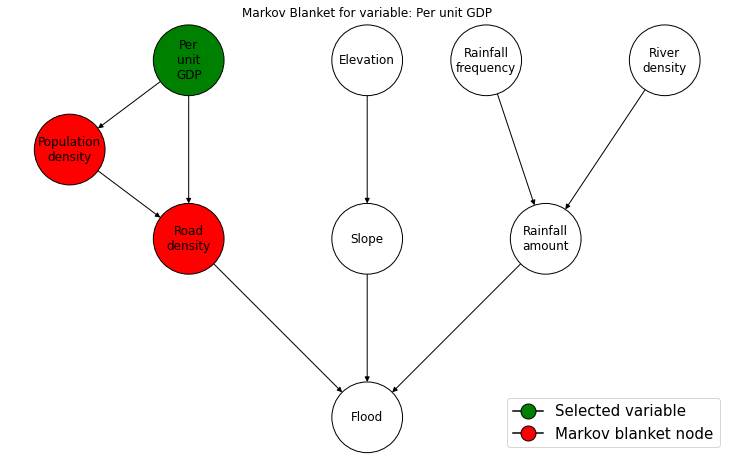


{'Population density': {'Population density'}}
Given ['Road density', 'Per unit GDP']


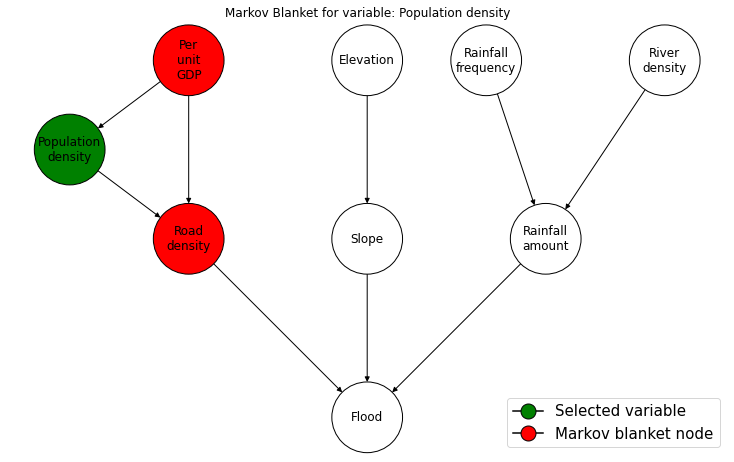


{'Road density': {'Road density'}}
Given ['Population density', 'Per unit GDP', 'Slope', 'Rainfall amount', 'Flood']


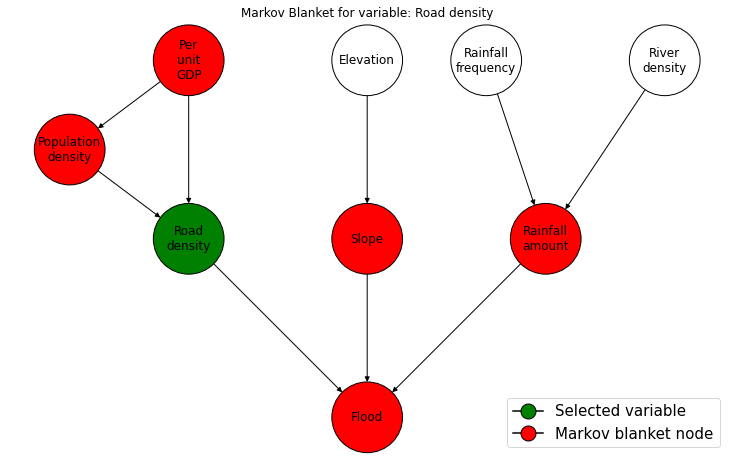


{'Elevation': {'Elevation'}}
Given ['Slope']


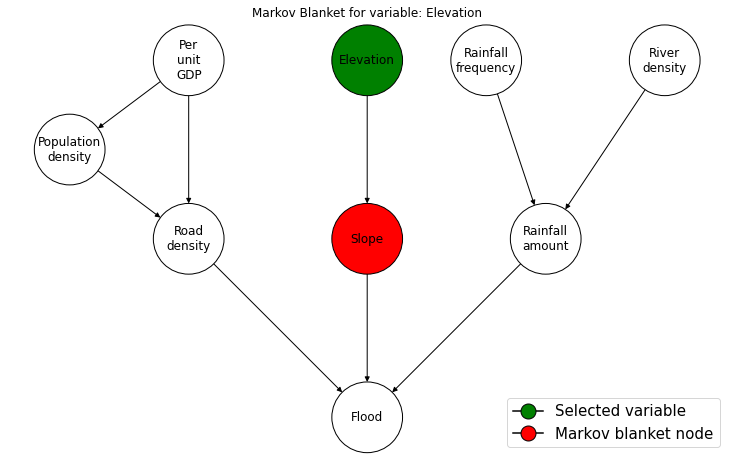


{'Slope': {'Slope'}}
Given ['Road density', 'Flood', 'Elevation', 'Rainfall amount']


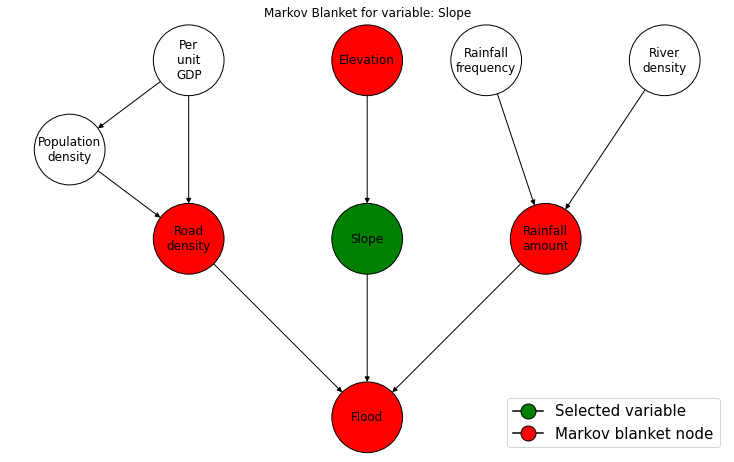


{'Rainfall frequency': {'Rainfall frequency'}}
Given ['Rainfall amount', 'River density']


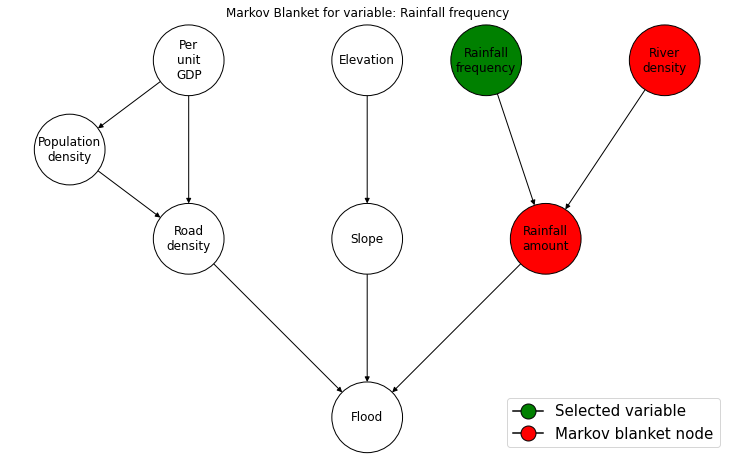


{'River density': {'River density'}}
Given ['Rainfall frequency', 'Rainfall amount']


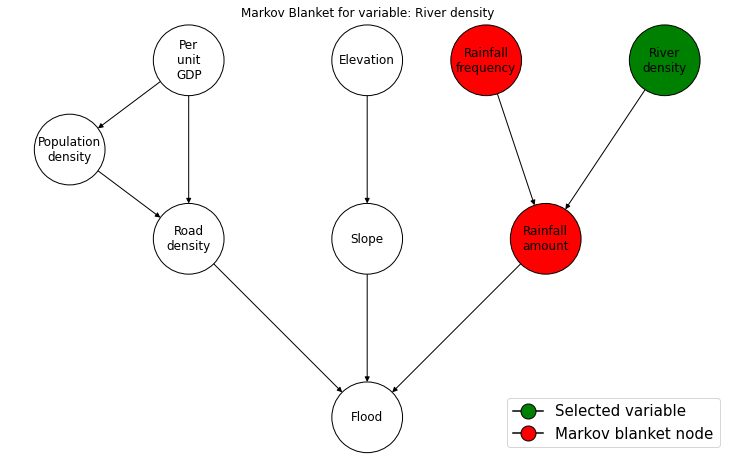


{'Rainfall amount': {'Rainfall amount'}}
Given ['Road density', 'Slope', 'Rainfall frequency', 'River density', 'Flood']


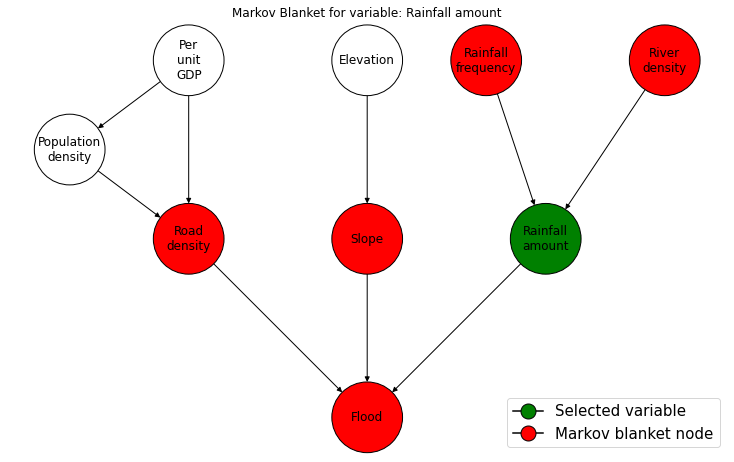


{'Flood': {'Flood'}}
Given ['Road density', 'Rainfall amount', 'Slope']


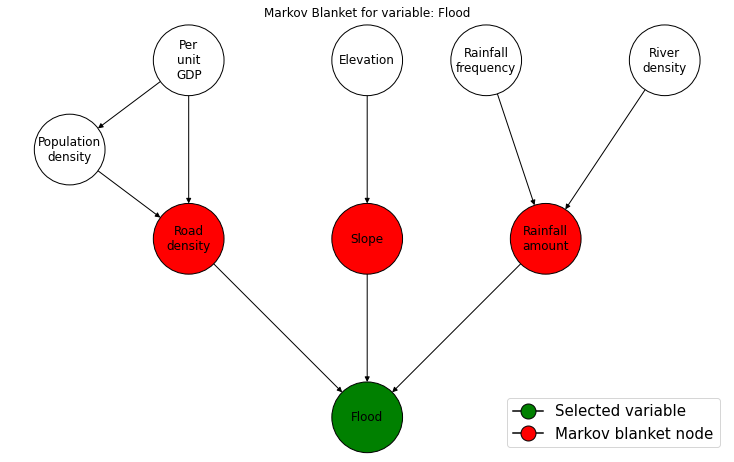

In [299]:
for v in variables:
    markov_blanket = model.get_markov_blanket(v)
    print(model.active_trail_nodes(v, observed=markov_blanket))
    print('Given {}'.format(markov_blanket))
    display_markov_blanket (model, v, markov_blanket)
    print()

# Exact inference

In [300]:
print(exact_infer.query([POPULATION_DENSITY], show_progress=False))

+----------------------------+---------------------------+
| Population density         |   phi(Population density) |
+============================+===========================+
| Population density(Dense)  |                    0.4025 |
+----------------------------+---------------------------+
| Population density(Medium) |                    0.4240 |
+----------------------------+---------------------------+
| Population density(Sparse) |                    0.1735 |
+----------------------------+---------------------------+


In [301]:
print(exact_infer.query([SLOPE], show_progress=False))

+--------------+--------------+
| Slope        |   phi(Slope) |
+==============+==============+
| Slope(Steep) |       0.2100 |
+--------------+--------------+
| Slope(Flat)  |       0.7900 |
+--------------+--------------+


In [302]:
exact_infer = VariableElimination(model)

**P(Flood)**

In [303]:
print(exact_infer.query([FLOOD], show_progress=False))

+------------+--------------+
| Flood      |   phi(Flood) |
+============+==============+
| Flood(Yes) |       0.0785 |
+------------+--------------+
| Flood(No)  |       0.9215 |
+------------+--------------+


**P(Flood | Road density = Dense)**

In [304]:
print(exact_infer.query([FLOOD], evidence={ROAD_DENSITY: 'Dense'}, show_progress=False))

+------------+--------------+
| Flood      |   phi(Flood) |
+============+==============+
| Flood(Yes) |       0.0999 |
+------------+--------------+
| Flood(No)  |       0.9001 |
+------------+--------------+


**P(Flood | River density = Dense)**

In [305]:
print(exact_infer.query([FLOOD], evidence={RIVER_DENSITY: 'Dense'}, show_progress=False))

+------------+--------------+
| Flood      |   phi(Flood) |
+============+==============+
| Flood(Yes) |       0.0938 |
+------------+--------------+
| Flood(No)  |       0.9062 |
+------------+--------------+


**P(Flood | Road density = Dense, Slope = Flat)**

In [306]:
print(exact_infer.query([FLOOD], evidence={ROAD_DENSITY: 'Dense', SLOPE: 'Flat'}, show_progress=False))

+------------+--------------+
| Flood      |   phi(Flood) |
+============+==============+
| Flood(Yes) |       0.1159 |
+------------+--------------+
| Flood(No)  |       0.8841 |
+------------+--------------+


**P(Flood | Road density = Dense, Slope = Flat, Rainfall Frequency = Frequent)**

In [307]:
print(exact_infer.query([FLOOD], evidence={ROAD_DENSITY: 'Dense', SLOPE: 'Flat', RAINFALL_FREQUENCY: 'Frequent'}, show_progress=False))

+------------+--------------+
| Flood      |   phi(Flood) |
+============+==============+
| Flood(Yes) |       0.1405 |
+------------+--------------+
| Flood(No)  |       0.8595 |
+------------+--------------+


**P(Flood | Road density = Medium, Slope = Flat, Rainfall Frequency = Frequent)**

In [308]:
print(exact_infer.query([FLOOD], evidence={ROAD_DENSITY: 'Medium', SLOPE: 'Flat', RAINFALL_FREQUENCY: 'Frequent'}, show_progress=False))

+------------+--------------+
| Flood      |   phi(Flood) |
+============+==============+
| Flood(Yes) |       0.0949 |
+------------+--------------+
| Flood(No)  |       0.9051 |
+------------+--------------+


**P(Flood | Road density = Dense, Slope = Steep, Rainfall Frequency = Frequent)**

In [309]:
print(exact_infer.query([FLOOD], evidence={ROAD_DENSITY: 'Dense', SLOPE: 'Steep', RAINFALL_FREQUENCY: 'Frequent'}, show_progress=False))

+------------+--------------+
| Flood      |   phi(Flood) |
+============+==============+
| Flood(Yes) |       0.0485 |
+------------+--------------+
| Flood(No)  |       0.9516 |
+------------+--------------+


**P(Slope | Flood = Yes)**

In [310]:
print(exact_infer.query([SLOPE], evidence={FLOOD: 'Yes'}, show_progress=False))

+--------------+--------------+
| Slope        |   phi(Slope) |
+==============+==============+
| Slope(Steep) |       0.0736 |
+--------------+--------------+
| Slope(Flat)  |       0.9264 |
+--------------+--------------+


**P(Rainfall Amount | Flood = Yes)**

In [311]:
print(exact_infer.query([RAINFALL_AMOUNT], evidence={FLOOD: 'Yes'}, show_progress=False))

+-------------------------+------------------------+
| Rainfall amount         |   phi(Rainfall amount) |
+=========================+========================+
| Rainfall amount(Huge)   |                 0.7210 |
+-------------------------+------------------------+
| Rainfall amount(Medium) |                 0.2605 |
+-------------------------+------------------------+
| Rainfall amount(Little) |                 0.0185 |
+-------------------------+------------------------+


**P(Rainfall Frequency | Rainfall Amount = Huge)**

In [312]:
print(exact_infer.query([RAINFALL_FREQUENCY], evidence={RAINFALL_AMOUNT: 'Huge'}, show_progress=False))

+------------------------------+---------------------------+
| Rainfall frequency           |   phi(Rainfall frequency) |
+==============================+===========================+
| Rainfall frequency(Frequent) |                    0.4157 |
+------------------------------+---------------------------+
| Rainfall frequency(Medium)   |                    0.5733 |
+------------------------------+---------------------------+
| Rainfall frequency(Rare)     |                    0.0110 |
+------------------------------+---------------------------+


**P(Rainfall Frequency | Rainfall Amount = Huge)**

In [313]:
print(exact_infer.query([RAINFALL_FREQUENCY], evidence={RAINFALL_AMOUNT: 'Little'}, show_progress=False))

+------------------------------+---------------------------+
| Rainfall frequency           |   phi(Rainfall frequency) |
+==============================+===========================+
| Rainfall frequency(Frequent) |                    0.2021 |
+------------------------------+---------------------------+
| Rainfall frequency(Medium)   |                    0.5106 |
+------------------------------+---------------------------+
| Rainfall frequency(Rare)     |                    0.2872 |
+------------------------------+---------------------------+


In [314]:
#print(exact_infer.query([RIVER_DENSITY], evidence={RAINFALL_AMOUNT: 'Huge'}, show_progress=False))

In [315]:
print(exact_infer.query([RAINFALL_AMOUNT], show_progress=False))

+-------------------------+------------------------+
| Rainfall amount         |   phi(Rainfall amount) |
+=========================+========================+
| Rainfall amount(Huge)   |                 0.4186 |
+-------------------------+------------------------+
| Rainfall amount(Medium) |                 0.2994 |
+-------------------------+------------------------+
| Rainfall amount(Little) |                 0.2820 |
+-------------------------+------------------------+


In [316]:
print(exact_infer.query([SLOPE], show_progress=False))

+--------------+--------------+
| Slope        |   phi(Slope) |
+==============+==============+
| Slope(Steep) |       0.2100 |
+--------------+--------------+
| Slope(Flat)  |       0.7900 |
+--------------+--------------+


# Approximate Inference

This section evaluates the approximate inference on a series of variables given evidence. The calculation is performed by using the Approximate Inference method `ApproxInference.query` which applies the *Negation Sampling*. The results are compared with their *Exact Inference* counterpart.

### Using Sampling

In [317]:
approx_infer_sampling = ExtendedApproxInference(model)

#### A comparison between exact and approximate inference will be performed in the following lines

In [318]:
print("Exact Inference to find P(Flood)\n")
print(exact_infer.query([FLOOD], show_progress=False))

print("Approximate Inference with sampling to find P(Flood)\n")
print(approx_infer_sampling.query(variables=[FLOOD], n_samples=10_000, show_progress=False))

Exact Inference to find P(Flood)

+------------+--------------+
| Flood      |   phi(Flood) |
+============+==============+
| Flood(Yes) |       0.0785 |
+------------+--------------+
| Flood(No)  |       0.9215 |
+------------+--------------+
Approximate Inference with sampling to find P(Flood)

+------------+--------------+
| Flood      |   phi(Flood) |
+============+==============+
| Flood(No)  |       0.9165 |
+------------+--------------+
| Flood(Yes) |       0.0835 |
+------------+--------------+


The result shows that approximate inference gives a very good estimation of the probability distribution of Flood, since the values are very close the ones we get with exact inference. The main reason is that we used a very high number of samples, which approximates well the limit to infinity

#### P(Flood | Road density = Dense, Slope = Flat, Rainfall Frequency = Frequent)
* Let's discuss the fact that the approximate inference should be maybe quicker rather than exact inference

In [319]:
import time
start_time = time.time_ns()

print("Exact Inference to find P(Flood | Per unit GDP = Dense, Slope = Flat, Rainfall Frequency = Frequent)\n")
print(exact_infer.query([FLOOD], 
                        evidence={PER_UNIT_GDP: 'Low', ELEVATION: 'Medium', RAINFALL_FREQUENCY: 'Rare'}, 
                        show_progress=False
))

print(f"--- {(time.time_ns() - start_time) / 1_000_000_000} seconds ---")

start_time = time.time_ns()

print("Approximate Inference with sampling to find P(Flood)\n")
print(approx_infer_sampling.query(variables=[FLOOD], 
                                  evidence={PER_UNIT_GDP: 'Low', ELEVATION: 'Medium', RAINFALL_FREQUENCY: 'Rare'}, 
                                  n_samples=100, show_progress=False
))


print(f"--- {(time.time_ns() - start_time)  / 1_000_000_000} seconds ---")

Exact Inference to find P(Flood | Per unit GDP = Dense, Slope = Flat, Rainfall Frequency = Frequent)

+------------+--------------+
| Flood      |   phi(Flood) |
+============+==============+
| Flood(Yes) |       0.0061 |
+------------+--------------+
| Flood(No)  |       0.9939 |
+------------+--------------+
--- 0.0217414 seconds ---
Approximate Inference with sampling to find P(Flood)

+-----------+--------------+
| Flood     |   phi(Flood) |
+===========+==============+
| Flood(No) |       1.0000 |
+-----------+--------------+
--- 0.0369013 seconds ---


#### P(Flood | Road density = Dense, Slope = Flat, Rainfall Frequency = Frequent)
* Let's discuss the fact that the approximate inference should be maybe quicker rather than exact inference

In [320]:

print("Exact Inference to find P(Flood|Road density = Dense, Slope = Flat, Rainfall Frequency = Frequent)\n")
print(exact_infer.query([FLOOD], 
                        evidence={ROAD_DENSITY: 'Dense', SLOPE: 'Steep', RAINFALL_FREQUENCY: 'Frequent'}, 
                        show_progress=False
))

print(f"--- {(time.time_ns() - start_time) / 1_000_000_000} seconds ---")

start_time = time.time_ns()

print("Approximate Inference with sampling to find P(Flood)\n")
print(approx_infer_sampling.query(variables=[FLOOD], 
                                  evidence={ROAD_DENSITY: 'Dense', SLOPE: 'Steep', RAINFALL_FREQUENCY: 'Frequent'}, 
                                  n_samples=500, show_progress=False
))


print(f"--- {(time.time_ns() - start_time)  / 1_000_000_000} seconds ---")

Exact Inference to find P(Flood|Road density = Dense, Slope = Flat, Rainfall Frequency = Frequent)

+------------+--------------+
| Flood      |   phi(Flood) |
+============+==============+
| Flood(Yes) |       0.0485 |
+------------+--------------+
| Flood(No)  |       0.9516 |
+------------+--------------+
--- 0.0738233 seconds ---
Approximate Inference with sampling to find P(Flood)

+------------+--------------+
| Flood      |   phi(Flood) |
+============+==============+
| Flood(No)  |       0.9560 |
+------------+--------------+
| Flood(Yes) |       0.0440 |
+------------+--------------+
--- 0.0398931 seconds ---


As for the case above, the estimation using approximate inference is very good, since we used many samples. Unfortunatelly, this results in having a longer execution time than using exact inference, so there is no benefit in using approximate inference with those many samples.
Rather, we can dramatically decrease the number of samples and see what happens

In [321]:
start_time = time.time_ns()

print("Approximate Inference with sampling to find P(Flood)\n")
print(approx_infer_sampling.query(variables=[FLOOD], evidence={ROAD_DENSITY: 'Dense', SLOPE: 'Steep', RAINFALL_FREQUENCY: 'Frequent'}, n_samples=1000, show_progress=False))

print(f"--- {(time.time_ns() - start_time)  / 1_000_000_000} seconds ---")

Approximate Inference with sampling to find P(Flood)

+------------+--------------+
| Flood      |   phi(Flood) |
+============+==============+
| Flood(No)  |       0.9500 |
+------------+--------------+
| Flood(Yes) |       0.0500 |
+------------+--------------+
--- 0.0378645 seconds ---


Approximate inference still works quiet well, but gives results worse than the first try with more samples. In addition, the execution time is perfectly comparable to the one of exact inference

# Approximate Inference with Likelihood Weighting

This section evaluates the approximate inference on a series of variables given evidence using the Likelihood Weighting method. The calculation is performed by using the `ApproxInferenceWeightedSampling.query` which extends the `ApproxInference.query` method by giving the option to use the *Likelihood Weighting* method on the *Bayesian Model*. The results are compared with their *Exact Inference* counterpart.

### Using Sampling
* Todo import just the extended method even for the above approximate inference method

In [322]:
#approx_infer_sampling = ApproxInferenceWeightedSampling(model)

#### A comparison between exact and approximate inference will be performed in the following lines

#### P(Flood | Road density = Dense, Slope = Flat, Rainfall Frequency = Frequent)
* Let's discuss the fact that the approximate inference should be maybe quicker rather than exact inference

In [323]:
# import time
start_time = time.time_ns()

print("Exact Inference to find P(Flood|Road density = Dense, Slope = Flat, Rainfall Frequency = Frequent)\n")
print(exact_infer.query([FLOOD], evidence={ROAD_DENSITY: 'Dense', SLOPE: 'Steep', RAINFALL_FREQUENCY: 'Frequent'}, show_progress=False))

print(f"--- {(time.time_ns() - start_time) / 1_000_000_000} seconds ---")

start_time = time.time_ns()

print("Approximate Inference with sampling to find P(Flood)\n")
print(approx_infer_sampling.query(
    variables=[FLOOD], evidence={ROAD_DENSITY: 'Dense', SLOPE: 'Steep', RAINFALL_FREQUENCY: 'Frequent'}, 
    n_samples=500, show_progress=True, use_weighted_sampling=True
))


print(f"--- {(time.time_ns() - start_time)  / 1_000_000_000} seconds ---")

Exact Inference to find P(Flood|Road density = Dense, Slope = Flat, Rainfall Frequency = Frequent)

+------------+--------------+
| Flood      |   phi(Flood) |
+============+==============+
| Flood(Yes) |       0.0485 |
+------------+--------------+
| Flood(No)  |       0.9516 |
+------------+--------------+
--- 0.0169521 seconds ---
Approximate Inference with sampling to find P(Flood)



  0%|          | 0/500 [00:00<?, ?it/s]

+------------+--------------+
| Flood      |   phi(Flood) |
+============+==============+
| Flood(No)  |       0.9500 |
+------------+--------------+
| Flood(Yes) |       0.0500 |
+------------+--------------+
--- 0.2039625 seconds ---


#### P(Flood | Per unit GDP = Low, Elevation = Medium, Rainfall Frequency = Rare)
* Let's discuss the fact that the approximate inference should be maybe quicker rather than exact inference

In [324]:
start_time = time.time_ns()

evidence_to_use = {PER_UNIT_GDP: 'Low', ELEVATION: 'Medium', RAINFALL_FREQUENCY: 'Rare'}

print("Exact Inference to find P(Flood|Road density = Dense, Slope = Flat, Rainfall Frequency = Frequent)\n")
print(exact_infer.query([FLOOD], evidence=evidence_to_use, show_progress=False))

print(f"--- {(time.time_ns() - start_time) / 1_000_000_000} seconds ---")

start_time = time.time_ns()

print("Approximate Inference with sampling to find P(Flood)\n")
print(approx_infer_sampling.query(variables=[FLOOD], evidence=evidence_to_use, n_samples=100, show_progress=True, 
                                  use_weighted_sampling=True))


print(f"--- {(time.time_ns() - start_time)  / 1_000_000_000} seconds ---")

Exact Inference to find P(Flood|Road density = Dense, Slope = Flat, Rainfall Frequency = Frequent)

+------------+--------------+
| Flood      |   phi(Flood) |
+============+==============+
| Flood(Yes) |       0.0061 |
+------------+--------------+
| Flood(No)  |       0.9939 |
+------------+--------------+
--- 0.0279249 seconds ---
Approximate Inference with sampling to find P(Flood)



  0%|          | 0/100 [00:00<?, ?it/s]

+------------+--------------+
| Flood      |   phi(Flood) |
+============+==============+
| Flood(No)  |       0.9900 |
+------------+--------------+
| Flood(Yes) |       0.0100 |
+------------+--------------+
--- 1.7669622 seconds ---


## Using Markov Chain Monte Carlo Method

In [325]:
from pgmpy.sampling import GibbsSampling

gibbs = GibbsSampling(model)
df = gibbs.sample(size=10000, seed=RANDOM_STATE)

  0%|          | 0/9999 [00:00<?, ?it/s]

In [326]:
df['Flood'].value_counts()


1    9218
0     782
Name: Flood, dtype: int64

In [327]:
#Flood  No:0, Yes:1
series_Flood = df['Flood'].value_counts()

print('Phi(Flood = Yes) =',series_Flood[0]/(sum(series_Flood)) )
print('Phi(Flood = No) = ',series_Flood[1]/(sum(series_Flood)) )

Phi(Flood = Yes) = 0.0782
Phi(Flood = No) =  0.9218


In [328]:
#EXAMPLE WITH MORE THAN ONE STATE
#Flood  No:0, Yes:1
#GDP high: 0, medium: 1, low: 2
series_Flood_GDP = df.loc[df['Per unit GDP'] == 0]['Flood'].value_counts()

print('Phi(Flood = Yes | Per unit GDP==High) =',series_Flood_GDP[0]/(sum(series_Flood_GDP)) )
print('Phi(Flood = No | Per unit GDP==High) = ',series_Flood_GDP[1]/(sum(series_Flood_GDP)) )

Phi(Flood = Yes | Per unit GDP==High) = 0.08849557522123894
Phi(Flood = No | Per unit GDP==High) =  0.911504424778761


Exact

# Use Case
* https://github.com/openpolis/geojson-italy

In [329]:
%store -r municipality_info_df

In [330]:
municipality_info_df.head()

,Municipality Name,Istat code,Province,Per unit GDP,Surface (km2),Population density,Road density,Slope,Elevation,River density,Rainfall frequency,Rainfall amount,Flood,Flood chances
0,abano terme,28001,PD,High,21.57,Dense,31.767918,Flat,13.535090,Dense,88.9,11.230011,2.302738,0.149864
1,adria,29001,RO,Medium,113.52,Medium,15.708153,Flat,1.057863,Sparse,79.7,9.271883,1.036059,0.100055
2,affi,23001,VR,Medium,9.85,Medium,17.881218,Flat,231.337300,Dense,90.4,9.490000,0.064442,0.125922
3,agna,28002,PD,Medium,18.83,Medium,10.466909,Flat,2.337880,Sparse,88.9,11.230165,0.998627,0.100055
4,agordo,25001,BL,High,23.67,Medium,6.942357,Steep,1267.740000,Dense,116.9,13.700024,0.000000,0.048363


In [331]:
#abc = exact_infer.query([FLOOD], evidence={ROAD_DENSITY: 'Dense', SLOPE: 'Steep', RAINFALL_FREQUENCY: 'Frequent'}, show_progress=False)

In [332]:
# abc.get_value(Flood='Yes')

In [333]:
municipality_info_df['flood_likelihood'] = municipality_info_df.apply(
    lambda row: exact_infer.query([FLOOD], evidence={
        PER_UNIT_GDP: row[PER_UNIT_GDP], 
        POPULATION_DENSITY: row[POPULATION_DENSITY], 
        SLOPE: row[SLOPE], 
        RIVER_DENSITY: row[RIVER_DENSITY],
        RAINFALL_FREQUENCY: 'Frequent'
    }, show_progress=False).get_value(Flood='Yes'), 
    axis=1
)

In [334]:
# municipality_info_df['Flood chances'].max()

In [335]:
import geopandas as gpd

In [336]:
'https://raw.githubusercontent.com/openpolis/geojson-italy/master/geojson/limits_R_5_municipalities.geojson'

'https://raw.githubusercontent.com/openpolis/geojson-italy/master/geojson/limits_R_5_municipalities.geojson'

In [337]:
#read in once
df_veneto = gpd.read_file('https://raw.githubusercontent.com/openpolis/geojson-italy/master/geojson/limits_R_5_municipalities.geojson')

In [338]:
df_veneto.head()

,name,minint_finloc,minint_elettorale,op_id,prov_name,prov_istat_code,prov_istat_code_num,prov_acr,reg_name,reg_istat_code,reg_istat_code_num,opdm_id,com_catasto_code,com_istat_code,com_istat_code_num,geometry
0,Affi,2050890010,1050890010,3216,Verona,023,23,VR,Veneto,05,5,3080,A061,023001,23001,"POLYGON ((10.80227 45.54440, 10.80002 45.54523..."
1,Albaredo d'Adige,2050890020,1050890020,3217,Verona,023,23,VR,Veneto,05,5,3081,A137,023002,23002,"POLYGON ((11.31571 45.27510, 11.30181 45.27369..."
2,Angiari,2050890030,1050890030,3218,Verona,023,23,VR,Veneto,05,5,3082,A292,023003,23003,"POLYGON ((11.26925 45.24528, 11.27418 45.24299..."
3,Arcole,2050890040,1050890040,3219,Verona,023,23,VR,Veneto,05,5,3083,A374,023004,23004,"POLYGON ((11.33498 45.38570, 11.32820 45.37363..."
4,Badia Calavena,2050890050,1050890050,3220,Verona,023,23,VR,Veneto,05,5,3084,A540,023005,23005,"POLYGON ((11.19320 45.59279, 11.18963 45.58946..."


In [339]:
df_veneto.shape


(563, 16)

In [341]:
df_veneto = pd.merge(
    df_veneto, 
    municipality_info_df[['Istat code','flood_likelihood']], 
    left_on='com_istat_code_num',
    right_on='Istat code', 
    how = 'left'
)

df_veneto.drop('Istat code', axis=1, inplace=True)

In [180]:
#The first line of code creates a new column full of 0 values
#The second line of code replaces the first 1700 rows with a
#random number between 1 and 7

#df_veneto.join(municipality_info_df, on='Istat code' 'com_istat_code_num')

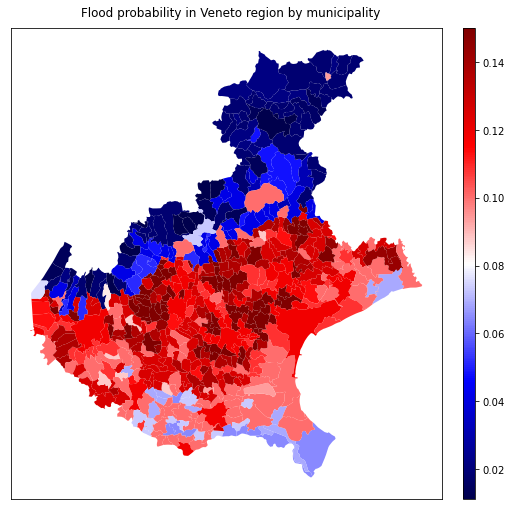

In [344]:
%matplotlib inline

from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, figsize=(10, 10))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=-1)

ax = df_veneto.plot(column='flood_likelihood', cmap='seismic' ,ax=ax, legend= True, cax=cax)

#plt.colorbar()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

fig.suptitle('Flood probability in Veneto region by municipality', y=0.86, x=0.56)
plt.show()